# PROJECT - 16

# HR ATTRITION RATE

In [11]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
data=pd.read_csv("HR_IBM.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [18]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [19]:
data.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

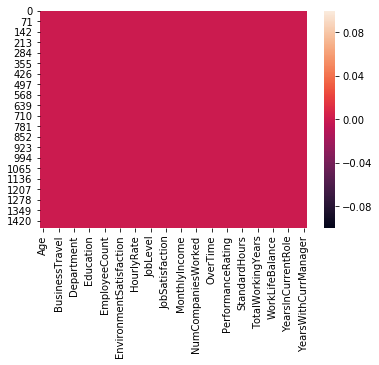

In [21]:
sns.heatmap(data.isnull())

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le_count=0
for col in data.columns[1:]:
   if data[col].dtype=='object':
    if len(list(data[col].unique()))<=2:
        le.fit(data[col])
        data[col]=le.transform(data[col])
        le_count +=1
print('{} columns were label encoded.',format(le_count))

{} columns were label encoded. 0


In [26]:
data=pd.get_dummies(data)
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,...,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,...,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,...,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,...,1,0,0,0,0,0,0,0,1,0


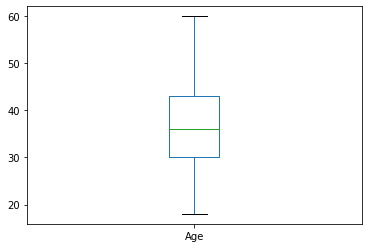

In [29]:
data["Age"].plot.box()

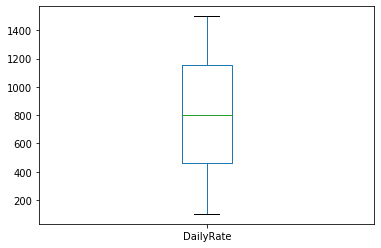

In [30]:
data["DailyRate"].plot.box()

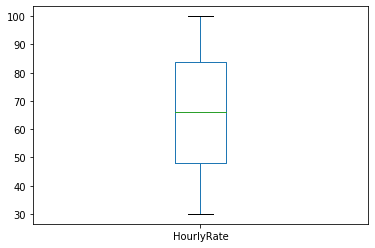

In [31]:
data["HourlyRate"].plot.box()

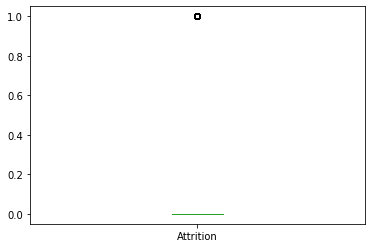

In [32]:
data["Attrition"].plot.box()

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data.astype(float))
data

array([[0.54761905, 1.        , 0.71581961, ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.        , 0.12670007, ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 1.        , 0.90980673, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.        , 0.03793844, ..., 0.        , 1.        ,
        0.        ],
       [0.73809524, 0.        , 0.65926986, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.        , 0.37652112, ..., 0.        , 1.        ,
        0.        ]])

In [34]:
df=pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.547619,1.0,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.0,0.914286,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.0,0.126700,0.250000,0.00,0.0,0.000484,0.666667,1.0,0.442857,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,1.0,0.909807,0.035714,0.25,0.0,0.001451,1.000000,1.0,0.885714,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.0,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.0,0.371429,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.0,0.350036,0.035714,0.00,0.0,0.002903,0.000000,1.0,0.142857,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,-0.036311,0.024287,...,-0.143176,0.294248,0.049726,0.185891,-0.146518,-0.002001,-0.175785,0.033120,0.083919,-0.119185
1,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,0.029453,-0.006846,...,0.098290,-0.083316,-0.082994,-0.088870,-0.000360,0.019774,0.157234,-0.087716,-0.090984,0.175419
2,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,-0.011716,0.023381,...,-0.006728,-0.013224,-0.005302,-0.000021,-0.002624,-0.000513,0.005375,0.037080,0.040035,-0.075835
3,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,-0.001851,0.031131,...,0.012369,-0.039190,0.011848,-0.022351,-0.010986,0.030761,-0.015994,-0.005440,0.030232,-0.027445
4,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,-0.016547,0.016775,...,-0.063566,0.028453,-0.005290,0.049694,0.000709,0.053398,-0.091465,-0.002439,-0.001865,0.004168
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.022556,0.035179,...,-0.019722,-0.035058,-0.014350,-0.013983,-0.017686,0.023263,0.006255,-0.025149,0.053933,-0.035189
7,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,0.000508,-0.049857,...,-0.001533,0.010730,0.059178,-0.048689,0.001940,-0.024421,0.002949,0.016439,-0.022180,0.009035
8,-0.036311,0.029453,-0.011716,-0.001851,-0.016547,NaN,0.022556,0.000508,1.000000,-0.000478,...,0.067793,-0.033880,-0.065197,-0.006121,0.009745,-0.005348,-0.028877,0.046076,-0.007804,-0.032752
9,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,-0.000478,1.000000,...,0.018028,0.012659,-0.014394,-0.025128,0.020034,-0.011886,-0.018703,-0.006150,0.036432,-0.033436


In [37]:
x=df.drop(1,axis=1)
x.head()

,0,2,3,4,5,6,7,8,9,10,...,44,45,46,47,48,49,50,51,52,53
0,0.547619,0.715820,0.000000,0.25,0.0,0.000000,0.333333,0.0,0.914286,0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.0,0.000484,0.666667,1.0,0.442857,0.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,0.0,0.001451,1.000000,1.0,0.885714,0.333333,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,0.0,0.001935,1.000000,0.0,0.371429,0.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.0,0.002903,0.000000,1.0,0.142857,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
y=df[1]
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      1.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      1.0
22      0.0
23      0.0
24      1.0
25      0.0
26      1.0
27      0.0
28      0.0
29      0.0
       ... 
1440    0.0
1441    0.0
1442    1.0
1443    0.0
1444    1.0
1445    0.0
1446    0.0
1447    0.0
1448    0.0
1449    0.0
1450    0.0
1451    0.0
1452    1.0
1453    0.0
1454    0.0
1455    0.0
1456    0.0
1457    0.0
1458    0.0
1459    0.0
1460    0.0
1461    1.0
1462    0.0
1463    0.0
1464    0.0
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: 1, Length: 1470, dtype: float64

In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=21)

In [42]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1161, 53)
(309, 53)
(1161,)
(309,)


In [44]:
lg=LogisticRegression()

In [46]:
lg.fit(x_train,y_train)

C:\Users\max\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
predlg=lg.predict(x_test)

In [48]:
print(accuracy_score(y_test,predlg))

0.9061488673139159


In [49]:
print(confusion_matrix(y_test,predlg))

[[256   4]
 [ 25  24]]


In [50]:
print(classification_report(y_test,predlg))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95       260
         1.0       0.86      0.49      0.62        49

    accuracy                           0.91       309
   macro avg       0.88      0.74      0.78       309
weighted avg       0.90      0.91      0.90       309



In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [54]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.8705501618122977
[[256   4]
 [ 36  13]]
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       260
         1.0       0.76      0.27      0.39        49

    accuracy                           0.87       309
   macro avg       0.82      0.62      0.66       309
weighted avg       0.86      0.87      0.84       309



In [55]:
svc=SVC(kernel="rbf")
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

C:\Users\max\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\max\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8414239482200647
[[260   0]
 [ 49   0]]
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       260
         1.0       0.00      0.00      0.00        49

    accuracy                           0.84       309
   macro avg       0.42      0.50      0.46       309
weighted avg       0.71      0.84      0.77       309



In [56]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7799352750809061
[[220  40]
 [ 28  21]]
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87       260
         1.0       0.34      0.43      0.38        49

    accuracy                           0.78       309
   macro avg       0.62      0.64      0.62       309
weighted avg       0.80      0.78      0.79       309



In [57]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8414239482200647
[[255   5]
 [ 44   5]]
              precision    recall  f1-score   support

         0.0       0.85      0.98      0.91       260
         1.0       0.50      0.10      0.17        49

    accuracy                           0.84       309
   macro avg       0.68      0.54      0.54       309
weighted avg       0.80      0.84      0.79       309



In [58]:
#ROC CURVE
from sklearn.metrics import roc_curve

In [59]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([1.43675643e-01, 2.42181083e-02, 5.89719869e-02, 1.34777981e-01,
       4.73564750e-02, 1.92830590e-02, 2.22807092e-01, 2.73449742e-02,
       1.42997132e-01, 3.13127218e-01, 3.05924160e-01, 7.43165455e-03,
       2.56882842e-01, 2.15419744e-02, 3.18729780e-02, 6.50202767e-02,
       1.22677067e-01, 2.72809861e-01, 7.74557207e-02, 2.30106442e-01,
       1.34576271e-01, 6.85344077e-02, 2.13944771e-02, 1.58155810e-02,
       1.30809119e-01, 3.44447099e-02, 5.12749651e-02, 1.30195112e-01,
       3.01843798e-03, 2.39165014e-02, 4.63792259e-02, 8.93871933e-01,
       1.99975531e-02, 1.19679832e-02, 1.24527795e-01, 3.45100680e-01,
       9.20974789e-02, 4.61112943e-01, 2.54959295e-01, 2.09979869e-01,
       4.26550950e-01, 1.40410632e-01, 1.24689446e-02, 7.58874176e-02,
       9.74636460e-02, 5.10831384e-01, 9.99171989e-03, 1.84528043e-01,
       2.50440327e-01, 1.84991548e-01, 3.93102183e-01, 1.13383333e-01,
       3.51905375e-01, 3.71382825e-01, 9.78427891e-03, 2.74514619e-02,
      

In [60]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [61]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.         0.00384615 0.00384615 0.00769231
 0.00769231 0.01153846 0.01153846 0.01538462 0.01538462 0.02307692
 0.02307692 0.02692308 0.02692308 0.03076923 0.03076923 0.08076923
 0.08076923 0.08846154 0.08846154 0.09615385 0.09615385 0.10384615
 0.10384615 0.16538462 0.16538462 0.18076923 0.18076923 0.19615385
 0.19615385 0.21538462 0.21538462 0.37307692 0.37307692 0.41153846
 0.41153846 0.57692308 0.57692308 0.58076923 0.58076923 0.64230769
 0.64230769 0.86538462 0.86538462 0.91538462 0.91538462 0.92692308
 0.92692308 1.        ]
[0.         0.02040816 0.24489796 0.24489796 0.28571429 0.28571429
 0.30612245 0.30612245 0.42857143 0.42857143 0.51020408 0.51020408
 0.53061224 0.53061224 0.55102041 0.55102041 0.57142857 0.57142857
 0.59183673 0.59183673 0.65306122 0.65306122 0.69387755 0.69387755
 0.71428571 0.71428571 0.73469388 0.73469388 0.7755102  0.7755102
 0.81632653 0.81632653 0.83673469 0.83673469 0.85714286 0.85714286
 0.87755102 0.87755102 0.89795918 0.897

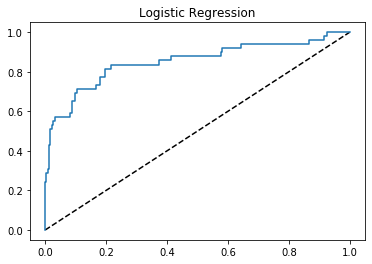

In [62]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="LogisticRegression")
plt.title("Logistic Regression")
plt.show()

In [63]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,lg.predict(x_test))
print(auc_score)

0.7372056514913659


In [64]:
#Saving the Model
from sklearn.externals import joblib
joblib.dump(lg,"HR_Attrition.pkl")

C:\Users\max\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['HR_Attrition.pkl']